<a href="https://colab.research.google.com/github/Mohamedasayed/Review/blob/main/review2edit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#% pip install pandas

In [4]:
data = pd.read_csv("Dataset 2.csv")

In [ ]:
data.head()

,ratings,reviews
0,1,Overall a good clubbing experience
1,1,Mr. Rajendra Singh Chauhan had provided excell...
2,1,Service was really was really good by vimal sa...
3,1,Awsme food and service...Mohit chaudhary good ...
4,1,This spot gives extraordinary service and yumm...


/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('reviews').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ratings']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ratings'}, axis=1)
              .sort_values('ratings', ascending=True))
  xs = counted['ratings']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('ratings', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('reviews')):
  _plot_series(series, series_name, i)
  fig.legend(title='reviews', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ratings')
_ = plt.ylabel('count()')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13988 entries, 0 to 13987
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ratings  13988 non-null  int64 
 1   reviews  13988 non-null  object
dtypes: int64(1), object(1)
memory usage: 218.7+ KB


In [ ]:
data.describe()

,ratings
count,13988.000000
mean,0.771375
std,0.419962
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
""" Number of unique values in the particular column"""
print(data['ratings'].nunique())
"""unique values in the particular column."""
print(data['ratings'].unique())
"""number of times the particular value repeated in that column through the data."""
print(data["ratings"].value_counts())


2
[1 0]
ratings
1    10790
0     3198
Name: count, dtype: int64


# Imbalanced Data

<Axes: xlabel='ratings', ylabel='count'>

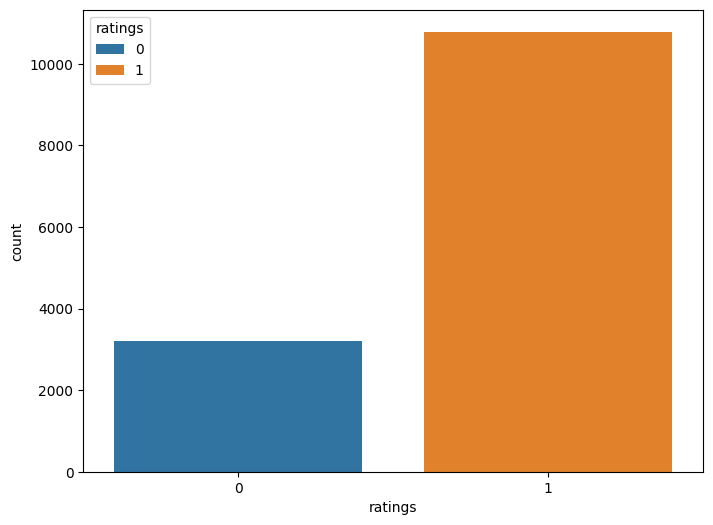

In [5]:
plt.figure(figsize=(8,6))
sns.countplot(x=data['ratings'],hue=data["ratings"])


In [6]:
print(data['reviews'].isnull().sum())
print(data['ratings'].isnull().sum())

0
0


In [7]:
x = data['reviews'].values
y = data["ratings"].values

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# oversampling using Smote

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [10]:
print("before sampling",sum(y_train==1))
print("before sampling",sum(y_train==0))

before sampling 7571
before sampling 2220


In [11]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)

x_sampled ,y_sampled = sm.fit_resample(x_train,y_train)


In [12]:
print("after sampling",sum(y_sampled==1))
print("after sampling",sum(y_sampled==0))

after sampling 7571
after sampling 7571


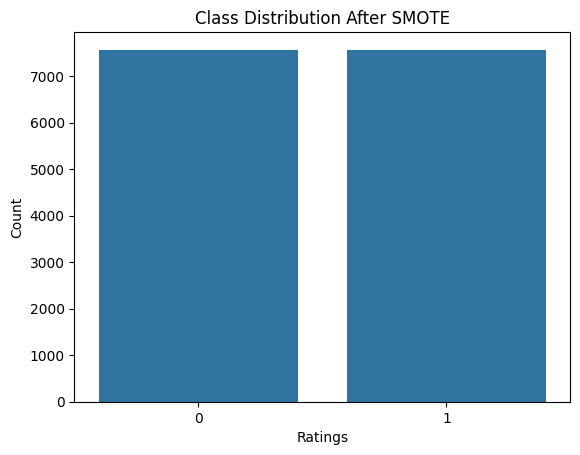

In [13]:
sns.countplot(x=y_sampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

# Support Vector Classifier(SVC)


In [ ]:
'''Train the Model'''
from sklearn.svm import SVC
model = SVC()
model.fit(x_sampled ,y_sampled)

SVC()

In [ ]:
ypred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,recall_score
ac_score = accuracy_score(ypred,y_test)
f_score = f1_score(ypred,y_test)
recall = recall_score(ypred,y_test)
cm = confusion_matrix(ypred,y_test).ravel()
print("accuracy score",ac_score)
print("f1 score",f_score) #best close to 1 F1-score :هو مقياس يعكس التوازن بين الدقة (Precision) و التذكر (Recall) في نموذج التصنيف. يتم حسابه
print("recall score",recall) # higher is better for finding good
print("confusion matrix",cm)
''' 1-count of true negatives  2-false negatives  3-true positives 4-false positives

الإيجابيات الحقيقية (True Positives - TP):
عدد الحالات التي تنتمي بالفعل إلى الفئة الإيجابية وتم تصنيفها بشكل صحيح كنفس الفئة من قبل النموذج.

الإيجابيات الكاذبة (False Positives - FP):
عدد الحالات التي تنتمي إلى الفئة السلبية ولكن تم تصنيفها بشكل خاطئ كفئة إيجابية.

السلبيات الحقيقية (True Negatives - TN):
عدد الحالات التي تنتمي إلى الفئة السلبية وتم تصنيفها بشكل صحيح كفئة سلبية.

السلبيات الكاذبة (False Negatives - FN):
عدد الحالات التي تنتمي إلى الفئة الإيجابية ولكن تم تصنيفها بشكل خاطئ كفئة سلبية
'''

accuracy score 0.9399571122230165
f1 score 0.9606003752345216
recall score 0.9669499527856469
confusion matrix [ 873  147  105 3072]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ypred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1020
           1       0.95      0.97      0.96      3177

    accuracy                           0.94      4197
   macro avg       0.92      0.91      0.92      4197
weighted avg       0.94      0.94      0.94      4197



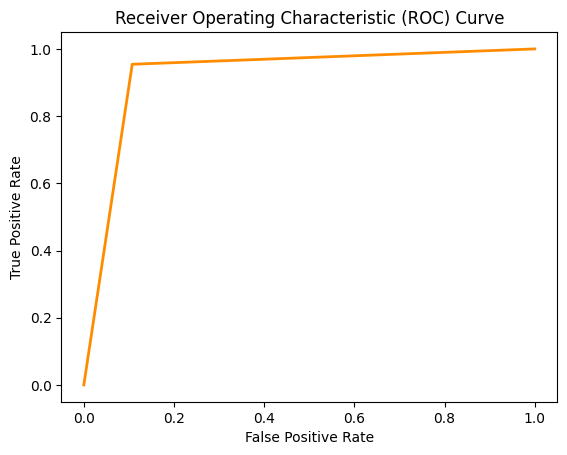

'\nTPR (معدل الإيجابيات الحقيقية).\nFPR (معدل الإيجابيات الكاذبة).\n'

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, ypred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.show()
'''
TPR (معدل الإيجابيات الحقيقية).
FPR (معدل الإيجابيات الكاذبة).
'''


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 199, in fit
    y = self._validate_targets(y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/sv

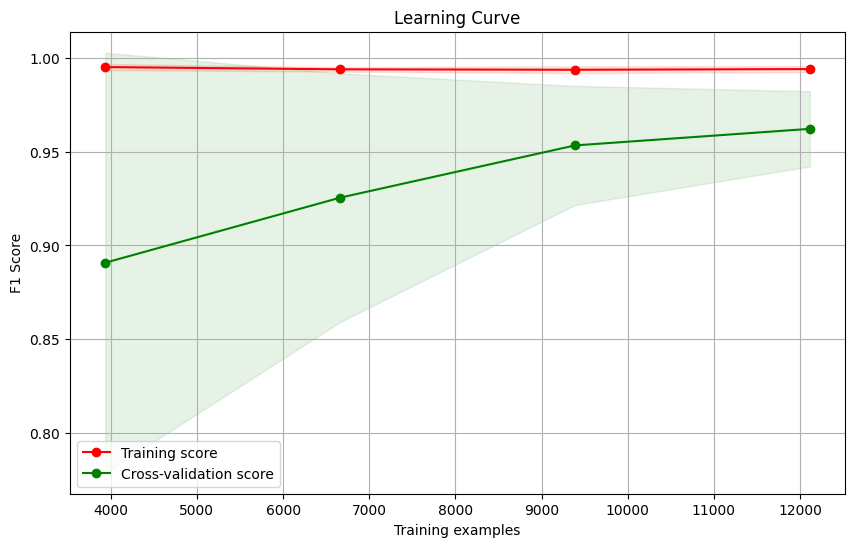

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Assuming 'model' is your trained SVC model
train_sizes, train_scores, test_scores = learning_curve(
    model, x_sampled, y_sampled, cv=5, scoring='f1'
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("F1 Score")
plt.grid()

plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
plt.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
plt.plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
)

plt.legend(loc="best")
plt.show()

# Stochastic Gradient Descent

In [14]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge")
clf.fit(x_sampled,y_sampled)


SGDClassifier()

In [16]:
ypred_sgd = clf.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,recall_score
ac_score = accuracy_score(ypred_sgd,y_test)
f_score = f1_score(ypred_sgd,y_test)
recall = recall_score(ypred_sgd,y_test)
cm = confusion_matrix(ypred_sgd,y_test).ravel()
print("accuracy score",ac_score)
print("f1 score",f_score) #best close to 1 F1-score :هو مقياس يعكس التوازن بين الدقة (Precision) و التذكر (Recall) في نموذج التصنيف. يتم حسابه
print("recall score",recall) # higher is better for finding good
print("confusion matrix",cm)

accuracy score 0.9337622111031689
f1 score 0.9557606619987269
recall score 0.9797716150081566
confusion matrix [ 916  216   62 3003]


In [23]:
from sklearn.metrics import classification_report
print(classification_report(ypred_sgd,y_test))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1132
           1       0.93      0.98      0.96      3065

    accuracy                           0.93      4197
   macro avg       0.93      0.89      0.91      4197
weighted avg       0.93      0.93      0.93      4197



In [21]:
from sklearn.metrics import accuracy_score ,f1_score,confusion_matrix,recall_score
accuracy_score(ypred_sgd,y_test)

0.9337622111031689

## DecisionTreeClassifier


In [40]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=20)
dtc.fit(x_sampled,y_sampled)


DecisionTreeClassifier(max_depth=20)

In [41]:
ypred_dtc = dtc.predict(x_test)


In [42]:
from sklearn.metrics import classification_report
print(classification_report(ypred_dtc,y_test))

              precision    recall  f1-score   support

           0       0.86      0.70      0.77      1213
           1       0.89      0.96      0.92      2984

    accuracy                           0.88      4197
   macro avg       0.87      0.83      0.85      4197
weighted avg       0.88      0.88      0.88      4197



## RandomForestClassifier


In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_sampled,y_sampled)

RandomForestClassifier()

In [45]:
ypred_rfc = rfc.predict(x_test)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(ypred_rfc,y_test))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1030
           1       0.94      0.96      0.95      3167

    accuracy                           0.92      4197
   macro avg       0.90      0.89      0.90      4197
weighted avg       0.92      0.92      0.92      4197

